# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

## **Problem 1.1**
**(5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise?**
**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering.

Let $A \in \mathbb{R}^{m \times n}, X \in \mathbb{R}^{n \times p}, B \in \mathbb{R}^{p \times k}$. Let us check shapes:

$(AXB) \in \mathbb{R}^{m \times k} \Rightarrow \mathrm{vec}(AXB) \in \mathbb{R}^{mk \times 1}$

$(B^\top \otimes A) \in \mathbb{R}^{mk \times pn}, \mathrm{vec}(X) \in \mathbb{R}^{pn \times 1} \Rightarrow (B^\top \otimes A)\, \mathrm{vec}(X) \in \mathbb{R}^{mk \times 1}$

$
A =
\begin{bmatrix}
a_{11} & \cdots & a_{1n} \\
\cdots & & \cdots  \\
a_{m1} & \cdots & a_{mn} \\
\end{bmatrix},
X =
\begin{bmatrix}
x_{11} & \cdots & x_{1p} \\
\cdots & & \cdots  \\
x_{n1} & \cdots & x_{np} \\
\end{bmatrix}
= 
\begin{bmatrix}
X_{:,1} & \cdots & X_{:,p} \\
\end{bmatrix},
B =
\begin{bmatrix}
b_{11} & \cdots & b_{1k} \\
\cdots & & \cdots  \\
b_{p1} & \cdots & b_{pk} \\
\end{bmatrix},
B^T =
\begin{bmatrix}
b_{11} & \cdots & b_{p1} \\
\cdots & & \cdots  \\
b_{1k} & \cdots & b_{pk} \\
\end{bmatrix},
\mathrm{vec}(X) =
\begin{bmatrix}
X_{:,1} \\
\cdots \\
X_{:,p} \\
\end{bmatrix}
$

1. Consider right-hand side:

$
(B^T \otimes A) \mathrm{vec}(X) = 
\begin{bmatrix}
b_{11} A & \cdots & b_{p1} A \\
\cdots & & \cdots  \\
b_{1k} A & \cdots & b_{pk} A \\
\end{bmatrix}
\begin{bmatrix}
X_{:,1} \\
\cdots \\
X_{:,p} \\
\end{bmatrix}
= 
\begin{bmatrix}
b_{11} A X_{:,1} + & \cdots & + b_{p1} A X_{:,p} \\
\cdots & & \cdots  \\
b_{1k} A X_{:,1} + & \cdots & + b_{pk} A X_{:,p}\\
\end{bmatrix}
$

2. Consider left-hand side:

$
\mathrm{vec}(AXB) = \mathrm{vec}
\Bigg(A
\begin{bmatrix}
X_{:,1} & \cdots & X_{:,p} \\
\end{bmatrix}
\begin{bmatrix}
b_{11} & \cdots & b_{1k} \\
\cdots & & \cdots  \\
b_{p1} & \cdots & b_{pk} \\
\end{bmatrix}
\Bigg)
= 
\mathrm{vec}
\Bigg(
\begin{bmatrix}
A X_{:,1} & \cdots & A X_{:,p} \\
\end{bmatrix}
\begin{bmatrix}
b_{11} & \cdots & b_{1k} \\
\cdots & & \cdots  \\
b_{p1} & \cdots & b_{pk} \\
\end{bmatrix}
\Bigg)
=
\mathrm{vec}(
\begin{bmatrix}
b_{11} A X_{:,1} + & \cdots & + b_{p1} A X_{:,p} \cdots \cdots \cdots b_{1k} A X_{:,1} + & \cdots & + b_{pk} A X_{:,p}\\
\end{bmatrix}
)
=
\begin{bmatrix}
b_{11} A X_{:,1} + & \cdots & + b_{p1} A X_{:,p} \\
\cdots & & \cdots  \\
b_{1k} A X_{:,1} + & \cdots & + b_{pk} A X_{:,p}\\
\end{bmatrix}
$

**Q.E.D**

If we have rowwise reshape, then: 
$
\mathrm{rowvec}(X) =
\begin{bmatrix}
X_{1,:} \\
\cdots \\
X_{n,:} \\
\end{bmatrix} = 
\mathrm{vec}(X^T)
$

Now we know: $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$

Therefore: $\mathrm{rowvec}(AXB) = \mathrm{vec}((AXB)^T) = \mathrm{vec}(B^T X^T A^T) = (A \otimes B^T)\, \mathrm{vec}(X^T) = (A \otimes B^T)\, \mathrm{rowvec}(X)$

So, $\mathrm{rowvec}(AXB) = (A \otimes B^T)\, \mathrm{rowvec}(X)$

Let us check it numerically:

In [1]:
import numpy as np

def vec(X):
    return np.reshape(X, (X.size,1), order='f')

def rowvec(X):
    return np.reshape(X, (X.size,1), order='c')

m,n,p,k = 3,4,5,3
A = np.random.randn(m,n)
X = np.random.randn(n,p)
B = np.random.randn(p,k)

print('All elements are close:',np.isclose(vec(A @ X @ B),np.kron(B.T,A) @ vec(X)).all())
print('All elements are close:',np.isclose(rowvec(A @ X @ B),np.kron(A,B.T) @ rowvec(X)).all())

All elements are close: True
All elements are close: True


## **Problem 1.2**
**(2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.**

Let $A \in \mathbb{R}^{m \times n}, B \in \mathbb{R}^{k \times p}, x \in \mathbb{R}^{np \times 1}$

**Complexity:**

Kronecker product $A \otimes B$ requires $O(mnkp)$ operations since we have to multiply each element of $A$ by each element of $B$.

Matvec multiplication requires $2nm - n$ operations ($m,n$  - matrix size). In our cace it will be $2nmkp - nm$ operations that equal $O(mnkp)$.

So, the total complexity is $O(mnkp)$ or $O(n^4)$ if $m=n=k=p$.

**How to reduce complexity?**

We will use this equality: $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$

We can see that $AXB$ requies $O(n^3)$ operations and we can imagine $(A \otimes B)x = \mathrm{vec}(B \mathrm{vec}^{-1}(x)A^T)$, where $\mathrm{vec}^{-1}$ - vector to matrix transformation.

This approach will reduce complexity from $O(n^4)$ to $O(n^3)$

## **Problem 1.3**
**(3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.**

$A \otimes I + I \otimes B = S_A\Lambda_A S_A^{-1} \otimes I + I \otimes S_B\Lambda_B S_B^{-1} \stackrel{\mathrm{1}}{=}
S_A\Lambda_A S_A^{-1} \otimes S_B S_B^{-1} + S_A S_A^{-1} \otimes S_B\Lambda_B S_B^{-1} \stackrel{\mathrm{2}}{=}
(S_A\Lambda_A \otimes S_B)(S_A^{-1} \otimes S_B^{-1}) + (S_A \otimes S_B \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) \stackrel{\mathrm{3}}{=}
(S_A\Lambda_A \otimes S_B + S_A \otimes S_B \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) \stackrel{\mathrm{4}}{=}
(S_A\Lambda_A \otimes S_B I+ S_A I \otimes S_B \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) \stackrel{\mathrm{2}}{=}
(S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) \stackrel{\mathrm{5}}{=}
(S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A \otimes S_B)^{-1}$

Used properties:
1. $I=S_A S_A^{-1}=S_B S_B^{-1}$
2. $(A\otimes B)(C\otimes D)=AC\otimes BD$ 
3. $ AC + BC = (A+B)C$
4. $ S_B I = S_B, S_A I = S_A $
5. $(A \otimes B)^{-1} = A^{-1} \otimes B^{-1}$

So, $A \otimes I + I \otimes B = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A \otimes S_B)^{-1} = S_{AB} \Lambda_{AB} S_{AB}^{-1}$

Here $\Lambda_{AB}$ is a diagonal matrix which is the eigendecomposition of the matrix $ A \otimes I + I \otimes B $.
 
The eigenvectors of the matrix are the columns of $S_{AB} = S_A \otimes S_B$ and the eigenvalues are $\lambda_{ij} = \lambda_{A_i} + \lambda_{B_j}, i \in [1,n], j \in [1, n]$

In [2]:
m = 4
n = 5
# random matrixes to test
A=np.diag(np.random.randn(m))
B=np.diag(np.random.randn(n))

# calculate real eigenvalues
real_eigs = np.linalg.eigvals(np.kron(A,np.eye(n))+np.kron(np.eye(m),B))

# calculate them theoretically
theor_eigs = []
for i in range(m):
    for j in range(n):
        theor_eigs.append(np.linalg.eigvals(A)[i]+np.linalg.eigvals(B)[j])
theor_eigs = np.array(theor_eigs)

# compare
print('All',len(theor_eigs),'eigenvalues are close:',np.isclose(theor_eigs,real_eigs).all())

All 20 eigenvalues are close: True


## **Problem 1.4**
**(10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).**

Let us find condition number.

$\mathrm{cond}(A) = \frac{\lambda_{max}}{\lambda_{min}}$. Since the matrix is diagonal, then $\mathrm{cond}(A) = \frac{1000}{0.001} = 10^6$.

Let $x_*$ be the solution.

Mark relative accuracy as $\varepsilon$: $\varepsilon = 10^{-4}$.

**Richardson iteration**

$q = \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1}$

An error for k-th step: $e_k = x_* - x_{k}$; for zero step $e_0 = x_* - x_0 = x_*$ (we assign $x_0$ as 0).

Absolute error for k-th step: $\|e_k\|_2 \leq q^{k} \|e_0\|_2$.

Relative error for k-th step: $\frac{||e_k||_2}{||e_0||_2} = \frac{||x_* - x_k||_2}{||x_*||_2} \leq q^k$.

It should be less or equal to $\varepsilon$: $q^k \leq \varepsilon$

$q^k \leq \varepsilon \Rightarrow k \geq log_q \varepsilon = \frac{\ln \varepsilon}{\ln q} \Rightarrow k \geq 4605171$

**Chebyshev iteration**

$q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}$

An error for k-th step: $e_k = x_* - x_{k}$; for zero step $e_0 = x_* - x_0 = x_*$ (we assign $x_0$ as 0).

Absolute error for k-th step: $\|e_k\|_2 \leq C q^{k} \|e_0\|_2$.

Relative error for k-th step: $\frac{||e_k||_2}{||e_0||_2} = \frac{||x_* - x_k||_2}{||x_*||_2} \leq C q^k$.

It should be less or equal to $\varepsilon$: $C q^k \leq \varepsilon \Rightarrow q^k \leq \frac{\varepsilon}{C}$

$q^k \leq \frac{\varepsilon}{C} \Rightarrow k \geq log_q \varepsilon - log_q C = \frac{\ln \varepsilon}{\ln q} - \frac{\ln C}{\ln q} \Rightarrow k \geq 4606$ (assume $C = 1$).

**Conjugate gradient method**

$q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}$

The same upper convergence bound as for Chebyshev: $\frac{\Vert x_* - x_k \Vert_A }{\Vert x_* \Vert_A} \leq \gamma q^k.$

From lecture 12: If eigenvalues are clustered and there are $l$ outliers, then after first $\mathcal{O}(l)$ iterations CG will converge as if there are no outliers (and hence the effective condition number is smaller).

In our case 1000 is outlier. Then condition number 1000 times lower. The CG method will converge:

$k \geq \frac{\ln \varepsilon}{\ln q} - \frac{\ln \gamma}{\ln q} \Rightarrow k \geq 146$ (assume $\gamma = 1$).

In [3]:
condA = 1000/0.001
eps = 10**(-4)

qR = (condA - 1)/(condA + 1)
numiter_richardson = np.ceil(np.log(eps)/np.log(qR)).astype(int)
print('The number of iterations for Richardson iteration:',numiter_richardson)

qC = (condA**0.5 - 1)/(condA**0.5 + 1)
C = 1
numiter_chebyshev = np.ceil(np.log(eps)/np.log(qC) - np.log(C)/np.log(qC)).astype(int)
print('The number of iterations for Chebyshev iteration: ',numiter_chebyshev)

condA = 1/0.001
qCG = (condA**0.5 - 1)/(condA**0.5 + 1)
gamma = 1
numiter_conj_grad = np.ceil(np.log(eps)/np.log(qCG) - np.log(gamma)/np.log(qCG)).astype(int)
print('The number of iterations for Chebyshev iteration: ',numiter_conj_grad)

The number of iterations for Richardson iteration: 4605171
The number of iterations for Chebyshev iteration:  4606
The number of iterations for Chebyshev iteration:  146


## **Problem 1.5**
**(5 pts) Provide numerical confirmation of your estimate from theoretical point of view**

In [4]:
import numpy as np

# create random number generator
rng1 = np.random.RandomState(1212)
rng2 = np.random.RandomState(32131)

# realtive error threshold (precision)
eps = 1e-4
# generate diagonal matrix
diagonal = np.concatenate((np.arange(1,1001)/1000,np.array([1000])))
A,dim_A = np.diag(diagonal),diagonal.shape[0]

# set right-hand side (ones or random)
# rhs = np.ones([dim_A,1])
rhs = rng1.randn(dim_A,1)

# calculate solution analytically
x_sol = (1 / diagonal).reshape(-1,1) * rhs

# initial approximation of the solution (zeros or random)
x0 = np.zeros([dim_A,1])
# x0 = rng2.randn(dim_A,1)

In [5]:
# CHEBYSHEV ITERATION

def CI(A,x0,rhs,x_sol,tau=1,tol=1e-4,max_iter=1e7):
    assert max_iter % 2 == 0
    
    # function from the lecture
    def leb_shuffle_2n(n):
        if n == 1:
            return np.array([0,], dtype=int)
        else:
            prev = leb_shuffle_2n(n // 2)
            ans = np.zeros(n, dtype=int)
            ans[::2] = prev
            ans[1::2] = n - 1 - prev
            return ans

    eigvals = np.linalg.eigvals(A)
    lmbd_min,lmbd_max = np.min(eigvals),np.max(eigvals)
    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * max_iter)) for i in range(max_iter)]
    taus = [(lmbd_max + lmbd_min - (lmbd_min - lmbd_max) * r) / 2 for r in roots]
    good_perm_even = leb_shuffle_2n(max_iter)
    
    # initialization
    x = x0
    r = A @ x - rhs
    x_sol_norm = np.linalg.norm(x_sol,ord=2)
    error = [np.linalg.norm(r)/x_sol_norm]
    # for each iteration
    for iteration in range(int(max_iter)):
        # main part
        x = x - 1.0 / taus[good_perm_even[iteration]] * r
        r = A @ x - rhs
        
        err = np.linalg.norm(r,ord=2)/x_sol_norm # calculate relative error
        error.append(err) # save statistics
        
        # terminate calculation
        if err < tol:
            break
    return iteration,error

# run method
numiter,error = CI(A,x0,rhs,x_sol,tau=1,tol=1e-4,max_iter=8192)

print('CHEBYSHEV ITERATION METHOD. The number of iteratinos to achieve',eps,'precision is',numiter,'. Error:',error[-1])

CHEBYSHEV ITERATION METHOD. The number of iteratinos to achieve 0.0001 precision is 4057 . Error: 9.841205526688171e-05


In [6]:
# RICHARDSON ITERATION

def RI(A,x0,rhs,x_sol,tau=1,tol=1e-4,max_iter=1e7):
    # initialization
    x_prev = x0
    x_sol_norm = np.linalg.norm(x_sol,ord=2)
    error = [np.linalg.norm(x_prev - x_sol)/x_sol_norm]
    # for each iteration
    for iteration in range(int(max_iter)):
        # main part
        rr = A @ x_prev - rhs
        x_next = x_prev - tau * rr
        
        err = np.linalg.norm(x_next - x_sol)/x_sol_norm # calculate relative error
        error.append(err) # save statistics
        if not iteration % 100000: print('Iteration:', iteration, 'Error:', err)
            
        # terminate calculation
        if err < tol:
            break

        # exchange variables
        x_prev = x_next
    return iteration,error

eigvals = np.linalg.eigvals(A) # find eigenvalues
tau_opt = 2 / (np.min(eigvals) + np.max(eigvals)) # calculate optimal tau

# run method
numiter, error = RI(A,x0,rhs,x_sol,tau=tau_opt,tol=eps,max_iter=1e7)

print('RICHARDSON ITERATION METHOD. The number of iteratinos to achieve',eps,'precision is',numiter,'. Error:',error[-1])

Iteration: 0 Error: 0.9999870274248644
Iteration: 100000 Error: 0.7150578643817648
Iteration: 200000 Error: 0.5669017059580489
Iteration: 300000 Error: 0.45665266674561594
Iteration: 400000 Error: 0.3702476176474748
Iteration: 500000 Error: 0.3012523851849066
Iteration: 600000 Error: 0.24564306750983822
Iteration: 700000 Error: 0.20057554144119458
Iteration: 800000 Error: 0.163924282232529
Iteration: 900000 Error: 0.13405015657590463
Iteration: 1000000 Error: 0.10966375738844303
Iteration: 1100000 Error: 0.08973736904085457
Iteration: 1200000 Error: 0.07344460839480663
Iteration: 1300000 Error: 0.06011703624738794
Iteration: 1400000 Error: 0.049211812938795146
Iteration: 1500000 Error: 0.04028691732597409
Iteration: 1600000 Error: 0.03298177523746061
Iteration: 1700000 Error: 0.027001897244017505
Iteration: 1800000 Error: 0.022106572301887995
Iteration: 1900000 Error: 0.01809894023395951
Iteration: 2000000 Error: 0.014817944754771852
Iteration: 2100000 Error: 0.012131789512391656
Itera

In [7]:
# CONJUGATE GRADIENT

def A_norm(A,err):
    return np.sqrt(err.T @ A @ err)

def CG(A,x0,rhs,x_sol,tol=1e-4,max_iter=5e3):
    # initialization
    r = rhs - A @ x0
    p = r
    x = x0
    x_sol_norm = A_norm(A, x_sol)
    error = [A_norm(A, x_sol - x0)/x_sol_norm]  # error history
    rr_prev = (r.T @ r)
    # for each iteration
    for iteration in range(int(max_iter)):
        # main part
        alpha = rr_prev / (p.T @ A @ p)
        x = x + alpha * p
        r = r - alpha * A @ p
        rr = r.T @ r
        beta = rr / rr_prev
        p = r + beta * p
        
        err =  A_norm(A, x_sol - x)/x_sol_norm # calculate relative error
        error.append(err[0,0]) # save statistics
        
        # terminate calculation
        if err < tol:
            break
            
        # exchange variables
        rr_prev = rr
    return iteration,error

# run method
numiter, error = CG(A,x0,rhs,x_sol,tol=eps,max_iter=5e3)

print('CONJUGATE GRADIENT METHOD. The number of iteratinos to achieve',eps,'precision is',numiter,'. Error:',error[-1])

CONJUGATE GRADIENT METHOD. The number of iteratinos to achieve 0.0001 precision is 140 . Error: 9.228576795721968e-05


## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

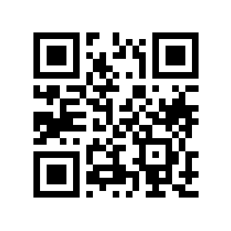

In [39]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-i_2)^2 + (j_1-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

(-0.5, 329.5, 329.5, -0.5)

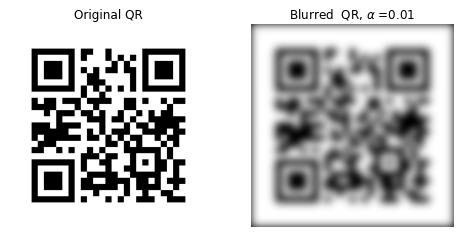

In [40]:
import numpy as np
import scipy
from scipy.sparse.linalg import LinearOperator

def T_matvec(x, aplha):
    # find image side
    n = int(len(x)**0.5)
    # reshape to the square form
    image_square = x.reshape(n,n)
    # create toeplitz vector
    bttb_row = np.array([(alpha/np.pi) * np.exp(-alpha * (i**2 + j**2)) for i in range(0,n) for j in range(n)])
    # toeplitz vector to toeplitz vector of toeplitz vectors
    topl_of_topl = bttb_row.reshape(n,n)
    # create toeplitz vector of circulant vectors
    topl_of_circ = np.hstack((topl_of_topl,topl_of_topl[:,1:][:,::-1]))
    # create a circulant vector of circulant vectors
    bccb = np.vstack((topl_of_circ,topl_of_circ[1:,:][::-1,:]))
    # calculate padding width
    pad_width = len(bccb) - len(image_square)
    
    # zero padding
    y = np.fft.ifft2(np.fft.fft2(bccb) * np.fft.fft2(np.pad(image_square,(0,pad_width))))[:n,:n].real
    
    # we can use 255 padding to avoid black image border. 
    
    # 255 padding
#     y = np.fft.ifft2(np.fft.fft2(bccb) * np.fft.fft2(np.pad(image_square,(0,pad_width),'constant', constant_values=255)))[:n,:n].real
    # use kernel only
#     y = np.fft.ifft2(np.fft.fft2(topl_of_topl) * np.fft.fft2(image_square))[:n,:n].real
    return y

# set alpha
alpha = 0.01
# create lin ear operator
T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# multiply T by image vector and reshape to sqare form
y = T.dot(x.reshape(-1,1)).reshape(n,n)

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(x, cmap='gray')
ax[0].set_title('Original QR')
ax[0].axis("off")
ax[1].imshow(y, cmap='gray')
ax[1].set_title(r'Blurred  QR, $\alpha$ ='+str(alpha))
ax[1].axis("off")

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

### Proof

An $n\times n$ symmetric real matrix $M$ is said to be **positive-definite** if $\mathbf{x}^{\textsf {T}}M \mathbf{x} >0$ for all non-zero  $\mathbf{x}$  in $\mathbb {R} ^{n}$. Also, $M$ is said to be **positive-definite** if its eigenvalues $\lambda_i > 0, \forall i$.

It is known that $T$ admits a Cholesky decomposition: $T = LL^T$, where $L$ - lower triangular matrix. Therefore, $ \det(T) = \det(LL^T) = \det(L)^2 > 0$.

For every vector $x$, the scalar product of $\mathbf{x}$ with $T\mathbf{x}$ is: $\mathbf{x}^T T \mathbf{x} = \mathbf{x} L^T L \mathbf{x} \geq 0$. Since $\det(T) \neq 0$, $T$ is positive definite.

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [41]:
# your code is here

# GC function
def conj_grad(T, y, tol, x, maxiter=None):
    num_iters = 0
    error_story = []
    def callback(xk):
        # calculate relative error for current iteration
        err = np.linalg.norm(xk - x.reshape(-1,),ord=2)/np.linalg.norm(x.reshape(-1,),ord=2)
        # save it
        error_story.append(err)
        nonlocal num_iters
        # increase the number of iterations
        num_iters += 1
    x_rec, state = scipy.sparse.linalg.cg(T, y, tol=tol, callback=callback, maxiter=maxiter)
    return x_rec, state, num_iters, error_story

# parameters grid
alphas = [1e-1,1e-2,1e-3]
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]
# to store results
results = {}

In [12]:
norm_x = np.linalg.norm(x.reshape(-1,1),ord=2) # initial image norm
for alpha in (alphas):
    for tol in (tols):
        # create linear operator for both convolution and deconvolution
        T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
        # find convolution
        y = T.dot(x.reshape(-1,1))
        # deconvolve result
        x_rec, state, num_iters, story = conj_grad(T, y, tol=tol, x = x, maxiter = None)
        # calculate relative error
        err = story[-1] # np.linalg.norm(x_rec - x.reshape(-1,),ord=2)/norm_x
        # creae a list of parameters for current experiment
        results['alpha='+str(alpha)+'_tol='+str(tol)] = [x_rec,num_iters,err,str(alpha),str(tol),story]

In [13]:
m = 0 # counter
dict_names = list(results.keys())
for i,row in enumerate(tols): # go along rows
    for j,figure in enumerate(alphas): # go along columns
        
        # read current parameters
        data = results[dict_names[m]]
        
        # extract it
        iters = data[1] # the number of iterations
        err = data[2] # relative error
        alpha = data[3] # current alpha
        tol = data[4] # current tolerance
        
        # print result
        print('ALPHA=',alpha,'; TOL=',tol,'; ERR=',np.round(err,3),'; ITERS=',iters)
        m += 1 # icrease counter

ALPHA= 0.1 ; TOL= 0.001 ; ERR= 0.128 ; ITERS= 11
ALPHA= 0.1 ; TOL= 0.0001 ; ERR= 0.102 ; ITERS= 46
ALPHA= 0.1 ; TOL= 1e-05 ; ERR= 0.096 ; ITERS= 136
ALPHA= 0.1 ; TOL= 1e-06 ; ERR= 0.072 ; ITERS= 788
ALPHA= 0.1 ; TOL= 1e-07 ; ERR= 0.067 ; ITERS= 2419
ALPHA= 0.01 ; TOL= 0.001 ; ERR= 0.215 ; ITERS= 18
ALPHA= 0.01 ; TOL= 0.0001 ; ERR= 0.202 ; ITERS= 53
ALPHA= 0.01 ; TOL= 1e-05 ; ERR= 0.197 ; ITERS= 168
ALPHA= 0.01 ; TOL= 1e-06 ; ERR= 0.195 ; ITERS= 559
ALPHA= 0.01 ; TOL= 1e-07 ; ERR= 0.189 ; ITERS= 2601
ALPHA= 0.001 ; TOL= 0.001 ; ERR= 0.436 ; ITERS= 13
ALPHA= 0.001 ; TOL= 0.0001 ; ERR= 0.42 ; ITERS= 49
ALPHA= 0.001 ; TOL= 1e-05 ; ERR= 0.4 ; ITERS= 158
ALPHA= 0.001 ; TOL= 1e-06 ; ERR= 0.38 ; ITERS= 509
ALPHA= 0.001 ; TOL= 1e-07 ; ERR= 0.37 ; ITERS= 1488


DECONVOLVED IMAGES


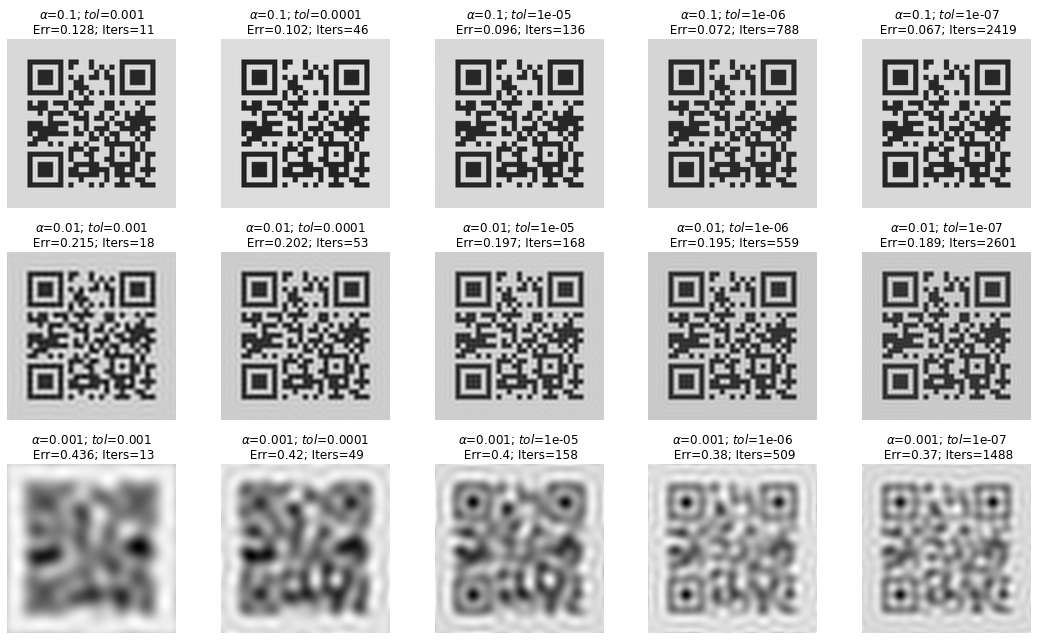

In [14]:
# NON-NECESSARY PART (TO SHOW RESULTS)
print('DECONVOLVED IMAGES')

koeff = 3
fig, ax = plt.subplots(len(alphas), len(tols), figsize=(5*koeff,3*koeff))
m = 0 # counter
dict_names = list(results.keys())
for i,row in enumerate(ax): # go along rows
    for j,figure in enumerate(row): # go along columns
        
        # read current parameters
        data = results[dict_names[m]]
        
        # extract it
        image = data[0] # full image
        iters = data[1] # the number of iterations
        err = data[2] # relative error
        alpha = data[3] # current alpha
        tol = data[4] # current tolerance
        
        # plot results
        ax[i,j].imshow(image.reshape(n,n), cmap='gray')
        ax[i,j].set_title(r'$\alpha$='+str(alpha)+'; $tol$='+str(tol)+'\n Err='+str(round(err,3))+'; Iters='+str(iters))
        ax[i,j].axis("off")
        m += 1 # increase counter
        
fig.tight_layout()

**1) why the relative error does not converge to zero?** 

### After convolution, a part of the information of the initial image is lost because convolution is an irreversible operation. So, the reconstruction method cannot achieve the exact initial vector, but it can restore it partially, up to certain precision depending on distortion magnitude. Therefore,  the relative error does not converge to zero.
    
**2) why the relative error converges to different values for different $\alpha$?**

### An amount of lost information after convolution depends on $\alpha$ and can restore original vector partially, up to certain precision depending on distortion magnitude.

Also, it can be folmulated as follows: Condition number of $T$ directly connected with $\alpha$ value. Relative error depends on condition number. Therefore resulting error will be different for different $\alpha$.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [107]:
# your code is here

# set parameters
alpha = 0.01
tol = 1e-5

# create linear operator
T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# find convolution
y = T.dot(x.reshape(-1,1))
# generate Gaussian noise
N = np.random.randn(y.shape[0],1)
print('Gaussian noise:')
print('Mean =',np.mean(N))
print('Var  =',np.var(N))
# add Gaussian
y_hat = y + N
# try to deconvolve y_hat
x_rec, state, num_iters, story = conj_grad(T, y_hat, tol=tol, x = x, maxiter = 100)
# it does not converge at all

Gaussian noise:
Mean = -0.00022159804687904935
Var  = 1.001721951967124


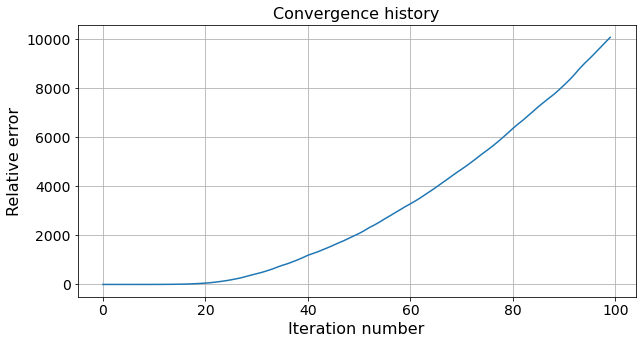

In [16]:
plt.figure(figsize=(10,5))
plt.title('Convergence history',fontsize=16)
plt.ylabel('Relative error',fontsize=16)
plt.xlabel('Iteration number',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.plot(story)

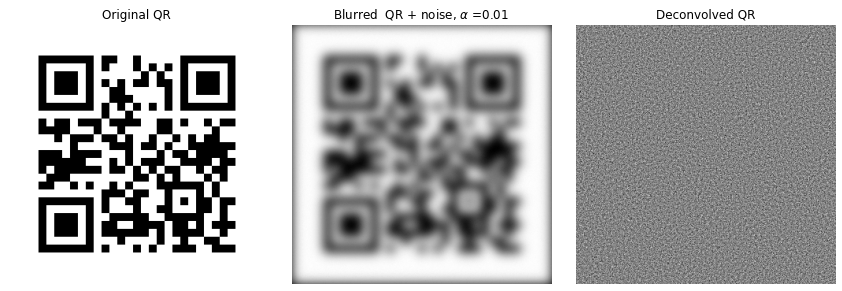

In [17]:
# NON-NECESSARY PART (TO SHOW RESULTS)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(x, cmap='gray')
ax[0].set_title('Original QR')
ax[0].axis("off")
ax[1].imshow(y_hat.reshape(n,n), cmap='gray')
ax[1].set_title(r'Blurred  QR + noise, $\alpha$ ='+str(alpha))
ax[1].axis("off")
ax[2].imshow(x_rec.reshape(n,n), cmap='gray')
ax[2].set_title('Deconvolved QR')
ax[2].axis("off")
fig.tight_layout()

**Explain, why CG does not converge.**

### Condition number of $T$ is very high. It means that a samll perturbation of an argument $x$ of linear system $T$ leads to significantly different result $y$. In inverse order it is also true: small perturbation of $y$ leads to high perturbation of estimated $x$. In this task we introduce a random error with quite high value: $\mathcal{N}(0, 1)$. So, CG tries to find solution of different linear system $y^* = T x^*$ where $x^*$ is totally diferent from exact initial solution $x$ due to ill-conditioned operator $T$. This leads to absence of convergence.

**Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?**

### To use CG, we can use regularization techniques, for example, Tikhonov regularization. It can dramatically decrease condition number of $T$ clusterizing its eigenvalues closer to each other. So, convergence rate will be much higher.

### The main drawback of this approach - additional calculations and difficulties with large matrices where we cannot explicitly add regularization due to its size.

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Сompare with Task 2. How can you verified that regularization leads to more robust convergence?

In [42]:
def T_lmbda_matvec(x, aplha, lmbda):
    # find image side
    n = int(len(x)**0.5)
    # reshape to the square form
    image_square = x.reshape(n,n)
    # create toeplitz vector
    bttb_row = np.array([(alpha/np.pi) * np.exp(-alpha * (i**2 + j**2)) for i in range(0,n) for j in range(n)])
    bttb_row[0] += lmbda**2
    # toeplitz vector to toeplitz vector of toeplitz vectors
    topl_of_topl = bttb_row.reshape(n,n)
    # create toeplitz vector of circulant vectors
    topl_of_circ = np.hstack((topl_of_topl,topl_of_topl[:,1:][:,::-1]))
    # create a circulant vector of circulant vectors
    bccb = np.vstack((topl_of_circ,topl_of_circ[1:,:][::-1,:]))
    # calculate padding width
    pad_width = len(bccb) - len(image_square)
    
    # zero padding
    y = np.fft.ifft2(np.fft.fft2(bccb) * np.fft.fft2(np.pad(image_square,(0,pad_width))))[:n,:n].real
    # 255 padding
#     y = np.fft.ifft2(np.fft.fft2(bccb) * np.fft.fft2(np.pad(image_square,(0,pad_width),'constant', constant_values=255)))[:n,:n].real
    # use kernel only
#     y = np.fft.ifft2(np.fft.fft2(topl_of_topl) * np.fft.fft2(image_square))[:n,:n].real
    return y

In [19]:
# your code is here

# parameters grid
alpha = 0.01
lambdas = [10,1,0.1]
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]
results_lambda = {}

norm_x = np.linalg.norm(x.reshape(-1,1),ord=2)
for lambd in (lambdas):
    for tol in (tols):
        # create linear operator for convolution
        T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
        # find convolution
        y = T.dot(x.reshape(-1,1))
        # generate Gaussian noise
        N = np.random.randn(y.shape[0],1)
        # add Gaussian noise
        y_hat = y + N
        # create linear operator for deconvolution
        T_lambda = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lambd))
        # deconvolve result
        x_rec, state, num_iters, story = conj_grad(T_lambda, y_hat, tol=tol, x=x, maxiter=None)
        # calculate relative error
        err = story[-1] # np.linalg.norm(x_rec - x.reshape(-1,),ord=2)/norm_x
        # creae a list of parameters for current experiment
        results_lambda['lambda='+str(lambd)+'_tol='+str(tol)] = [x_rec,num_iters,err,str(lambd),str(tol),story]

In [20]:
m = 0 # counter
dict_names = list(results_lambda.keys())
for i,row in enumerate(tols): # go along rows
    for j,figure in enumerate(alphas): # go along columns
        
        # read current parameters
        data = results_lambda[dict_names[m]]
        
        # extract it
        iters = data[1] # the number of iterations
        err = data[2] # relative error
        lambd = data[3] # current alpha
        tol = data[4] # current tolerance
        
        # print result
        print('LAMBDA=',lambd,'; TOL=',tol,'; ERR=',np.round(err,3),'; ITERS=',iters)
        m += 1 # icrease counter

LAMBDA= 10 ; TOL= 0.001 ; ERR= 0.992 ; ITERS= 1
LAMBDA= 10 ; TOL= 0.0001 ; ERR= 0.992 ; ITERS= 2
LAMBDA= 10 ; TOL= 1e-05 ; ERR= 0.992 ; ITERS= 2
LAMBDA= 10 ; TOL= 1e-06 ; ERR= 0.992 ; ITERS= 3
LAMBDA= 10 ; TOL= 1e-07 ; ERR= 0.992 ; ITERS= 3
LAMBDA= 1 ; TOL= 0.001 ; ERR= 0.615 ; ITERS= 4
LAMBDA= 1 ; TOL= 0.0001 ; ERR= 0.615 ; ITERS= 5
LAMBDA= 1 ; TOL= 1e-05 ; ERR= 0.615 ; ITERS= 6
LAMBDA= 1 ; TOL= 1e-06 ; ERR= 0.615 ; ITERS= 8
LAMBDA= 1 ; TOL= 1e-07 ; ERR= 0.615 ; ITERS= 9
LAMBDA= 0.1 ; TOL= 0.001 ; ERR= 0.511 ; ITERS= 19
LAMBDA= 0.1 ; TOL= 0.0001 ; ERR= 0.517 ; ITERS= 28
LAMBDA= 0.1 ; TOL= 1e-05 ; ERR= 0.516 ; ITERS= 38
LAMBDA= 0.1 ; TOL= 1e-06 ; ERR= 0.515 ; ITERS= 50
LAMBDA= 0.1 ; TOL= 1e-07 ; ERR= 0.516 ; ITERS= 61


DECONVOLVED IMAGES


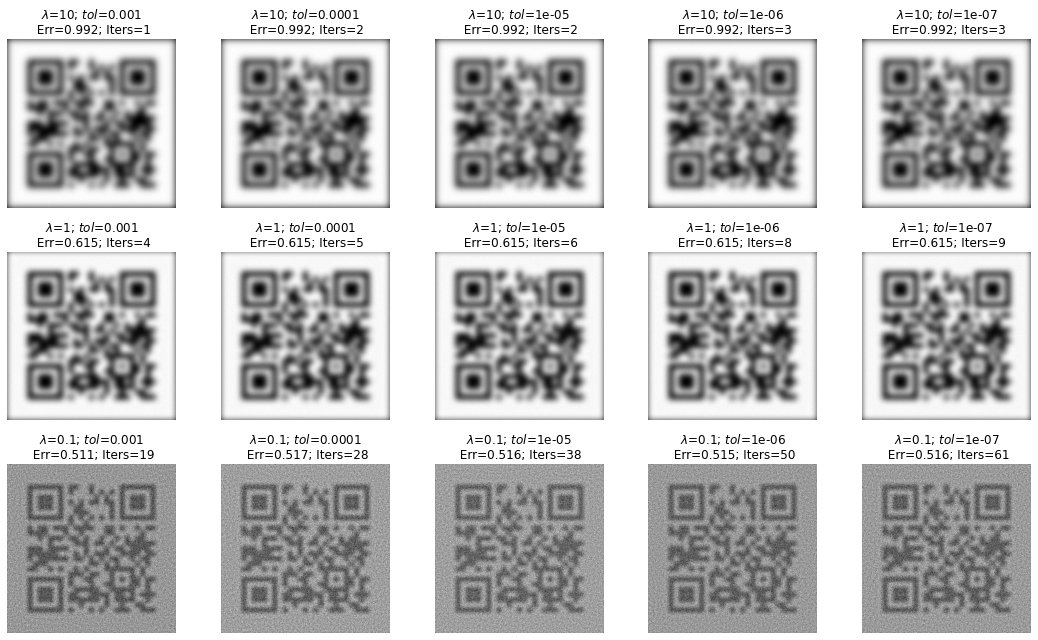

In [21]:
# NON-NECESSARY PART (TO SHOW RESULTS)
print('DECONVOLVED IMAGES')

koeff = 3
fig, ax = plt.subplots(len(alphas), len(tols), figsize=(5*koeff,3*koeff))
m = 0 # counter
dict_names = list(results_lambda.keys())
for i,row in enumerate(ax): # go along rows
    for j,figure in enumerate(row): # go along columns
        
        # read current parameters
        data = results_lambda[dict_names[m]]
        
        # extract it
        image = data[0] # full image
        iters = data[1] # the number of iterations
        err = data[2] # relative error
        lambd = data[3] # current alpha
        tol = data[4] # current tolerance
        
        # plot results
        ax[i,j].imshow(image.reshape(n,n), cmap='gray')
        ax[i,j].set_title(r'$\lambda$='+str(lambd)+'; $tol$='+str(tol)+'\n Err='+str(round(err,3))+'; Iters='+str(iters))
        ax[i,j].axis("off")
        m += 1 # increase counter
        
fig.tight_layout()

**Сompare with Task 2. How can you verified that regularization leads to more robust convergence?**

## It can be seen that regularization has significantly improved convergence. We can verify it by calculating and comparing eigenvalues of $T$ and $T_{\lambda}$. In the second case they will be clusterized closer to each other, therefore condition number will be lower. So, regularization increases covergence.

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [47]:
def C_inv_matvec(x, alpha, lmbda):
    # find image side
    n = int(len(x)**0.5)
    # reshape to the square form
    image_square = x.reshape(n,n)
    # create toeplitz vector
    bttb_row = np.array([(alpha/np.pi) * np.exp(-alpha * (i**2 + j**2)) for i in range(0,n) for j in range(n)])
    bttb_row[0] += lmbda**2
    # toeplitz vector to toeplitz vector of toeplitz vectors
    topl_of_topl = bttb_row.reshape(n,n)
    # create toeplitz vector of circulant vectors
    topl_of_circ = np.hstack((topl_of_topl,topl_of_topl[:,1:][:,::-1]))
    # create a circulant vector of circulant vectors
    bccb = np.vstack((topl_of_circ,topl_of_circ[1:,:][::-1,:]))
    # calculate padding width
    pad_width = len(bccb) - len(image_square)

    Cy = np.fft.ifft2(1/np.fft.fft2(bccb) * np.fft.fft2(np.pad(image_square,(0,pad_width))))[:n,:n].real
#     Cy = np.fft.ifft2(1/np.fft.fft2(bccb[:n,:n]) * np.fft.fft2(image_square))[:n,:n].real
    return Cy

# GC function
def conj_grad_1(T, y, tol, maxiter, prec):
    num_iters = 0
    def callback(xk):
        nonlocal num_iters
        num_iters += 1
    x_rec, state = scipy.sparse.linalg.cg(T, y, tol=tol, callback=callback,M=prec,maxiter=maxiter)
    return x_rec, state, num_iters

# set parameters
alpha = 0.01
lmbda = 1
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]

# create linear operator for convolution
T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# create linear operator for deconvolution
T_lambda = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lmbda))
# create preconditioner linear operator
C = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : C_inv_matvec(x, alpha, lmbda))
# find convolution
y = T.dot(x.reshape(-1,1))
# generate Gaussian noise
N = np.random.randn(y.shape[0],1)
# add Gaussian noise
y_hat = y + N

for tol in tols:
    print('TOL=',tol)
    x_rec, state, num_iters = conj_grad_1(T_lambda,y_hat, tol=tol, prec=None,maxiter=100)
    print('Num iters without preconditioner',num_iters)
    x_rec, state, num_iters = conj_grad_1(T_lambda,y_hat, tol=tol, prec=C,maxiter=100)
    print('Num iters with preconditioner',num_iters)
    print()

TOL= 0.001
Num iters without preconditioner 4
Num iters with preconditioner 2

TOL= 0.0001
Num iters without preconditioner 5
Num iters with preconditioner 2

TOL= 1e-05
Num iters without preconditioner 6
Num iters with preconditioner 3

TOL= 1e-06
Num iters without preconditioner 8
Num iters with preconditioner 3

TOL= 1e-07
Num iters without preconditioner 9
Num iters with preconditioner 4



## Preconditioner decreases condition number of ill-conditioned system. It allows acheiving the same performance in a smaller number of iterations and shorter time.
